Adriel Casellas

# Credit Exploratory Data Analysis

### Background

This dataset contains credit balance from several clients of a credit card company, along with several other characteristics of those clients. Credit card companies take losses when clients have too high, or too low of balances. Clients can declare bankruptcy when they are unable to pay their debts, but they allow for no accrued interest when the client's balance is too low. The most profitable clients are those with a moderate credit card balance upon which interest can be charged. Your task is to explore this data to find some of the relationships between the provided demographics and credit card balance. 

### Setup

In [107]:
library(dplyr)
library(ggplot2)
library(cluster)
library(ggdendro)

credit <- read.csv('Credit.csv')
glimpse(credit)
summary(credit)

Observations: 310
Variables: 11
$ Income    <dbl> 14.891, 106.025, 104.593, 148.924, 55.882, 80.180, 20.996...
$ Limit     <int> 3606, 6645, 7075, 9504, 4897, 8047, 3388, 7114, 3300, 681...
$ Rating    <int> 283, 483, 514, 681, 357, 569, 259, 512, 266, 491, 589, 39...
$ Cards     <int> 2, 3, 4, 3, 2, 4, 2, 2, 5, 3, 4, 1, 1, 2, 3, 1, 2, 4, 1, ...
$ Age       <int> 34, 82, 71, 36, 68, 77, 37, 87, 66, 41, 30, 57, 49, 75, 6...
$ Education <int> 11, 15, 11, 11, 16, 10, 12, 9, 13, 19, 14, 7, 9, 13, 15, ...
$ Gender    <fctr>  Male, Female,  Male, Female,  Male,  Male, Female,  Mal...
$ Student   <fctr> No, Yes, No, No, No, No, No, No, No, Yes, No, No, No, No...
$ Married   <fctr> Yes, Yes, No, No, Yes, No, No, No, No, Yes, Yes, Yes, Ye...
$ Ethnicity <fctr> Caucasian, Asian, Asian, Asian, Caucasian, Caucasian, Af...
$ Balance   <int> 333, 903, 580, 964, 331, 1151, 203, 872, 279, 1350, 1407,...


     Income           Limit           Rating          Cards      
 Min.   : 10.35   Min.   : 1160   Min.   :126.0   Min.   :1.000  
 1st Qu.: 23.15   1st Qu.: 3976   1st Qu.:304.0   1st Qu.:2.000  
 Median : 37.14   Median : 5147   Median :380.0   Median :3.000  
 Mean   : 49.98   Mean   : 5485   Mean   :405.1   Mean   :2.997  
 3rd Qu.: 63.74   3rd Qu.: 6453   3rd Qu.:469.0   3rd Qu.:4.000  
 Max.   :186.63   Max.   :13913   Max.   :982.0   Max.   :9.000  
      Age          Education        Gender    Student   Married  
 Min.   :23.00   Min.   : 5.00    Male :145   No :271   No :118  
 1st Qu.:42.00   1st Qu.:11.00   Female:165   Yes: 39   Yes:192  
 Median :55.50   Median :14.00                                   
 Mean   :55.61   Mean   :13.43                                   
 3rd Qu.:69.00   3rd Qu.:16.00                                   
 Max.   :98.00   Max.   :20.00                                   
            Ethnicity      Balance      
 African American: 78   Min.   :   

### Analysis 1: Hclust

Create a distance matrix with the daisy function (this handles factor variables as well)

In [35]:
credit.dist <- daisy(credit)

Invoke hclust() to perform hierarchical clustering on the distance matrix

In [36]:
credit.hc <- hclust(credit.dist, method = "complete")

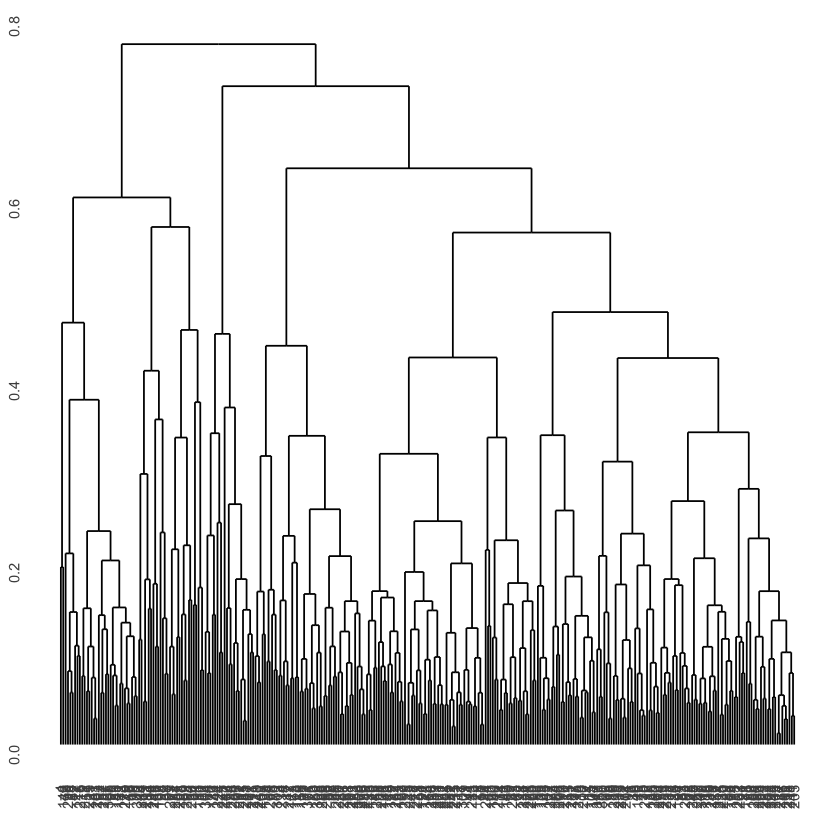

In [51]:
ggdendrogram(credit.hc, k = 5, border="red")

Use cophenetic correlation coefficient to determine how well the dendogram represents the distance matrix

In [52]:
cor(cophenetic(credit.hc), credit.dist)

[1] 0.5623255

The CCPC indicates a mild fit to the distance matrix. Based on the groupings and the heights of the dendogram groups, 4 clusters seems to sufficiently segment the data.

### Analysis 2: Comparing differences between clusters

The cutree function returns the assignment vector for each observation

In [66]:
credit.hc.seg <- cutree(credit.hc, k = 4)

In order to compare differences between the segments, we will create a segment summary function to process the hclust output

In [67]:
seg_summary <- function(data, cluster) {
  # Ensure every variable is numeric
  data_num <- data
  for (i in 1:ncol(data)) {
    data_num[,i] <- as.numeric(data[,i])
  }
  # Compute means by cluster/segment.
  print(aggregate(data_num, list(cluster), mean))
  clusplot(data_num, cluster, color=T, shade = T, labels=max(cluster), lines=0, main = "Cluster Plot")
}

  Group.1    Income    Limit   Rating    Cards      Age Education   Gender
1       1  40.45598 5006.227 372.7569 2.966851 55.36464  13.49724 1.607735
2       2  49.71639 5244.820 390.3770 3.000000 55.14754  13.13115 1.786885
3       3  53.25421 5753.383 419.7234 2.978723 55.38298  13.48936 1.000000
4       4 125.48814 9715.476 693.1905 3.285714 59.52381  13.52381 1.333333
   Student  Married Ethnicity   Balance
1 1.016575 1.856354  2.165746  553.7238
2 1.590164 1.262295  2.540984  829.6230
3 1.000000 1.000000  2.170213  664.0213
4 1.000000 2.000000  2.428571 1236.4762


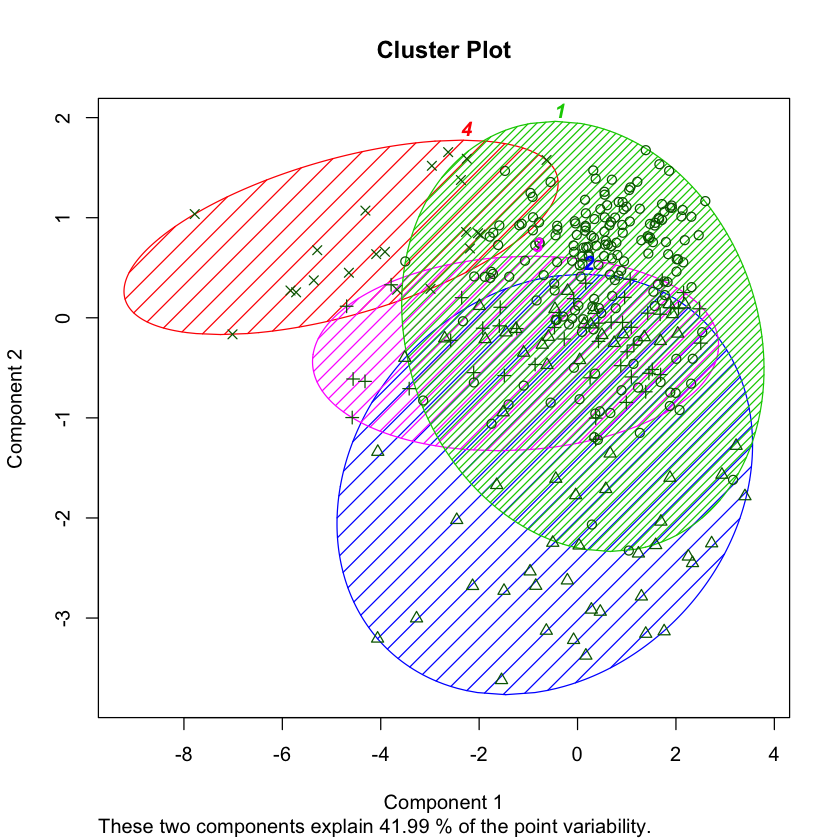

In [68]:
seg_summary(credit, credit.hc.seg)

We will add the segment assignments to the original data frame to do some more exploratory analysis into the differences between the segements

In [93]:
credit$Segment <- as.factor(credit.hc.seg)

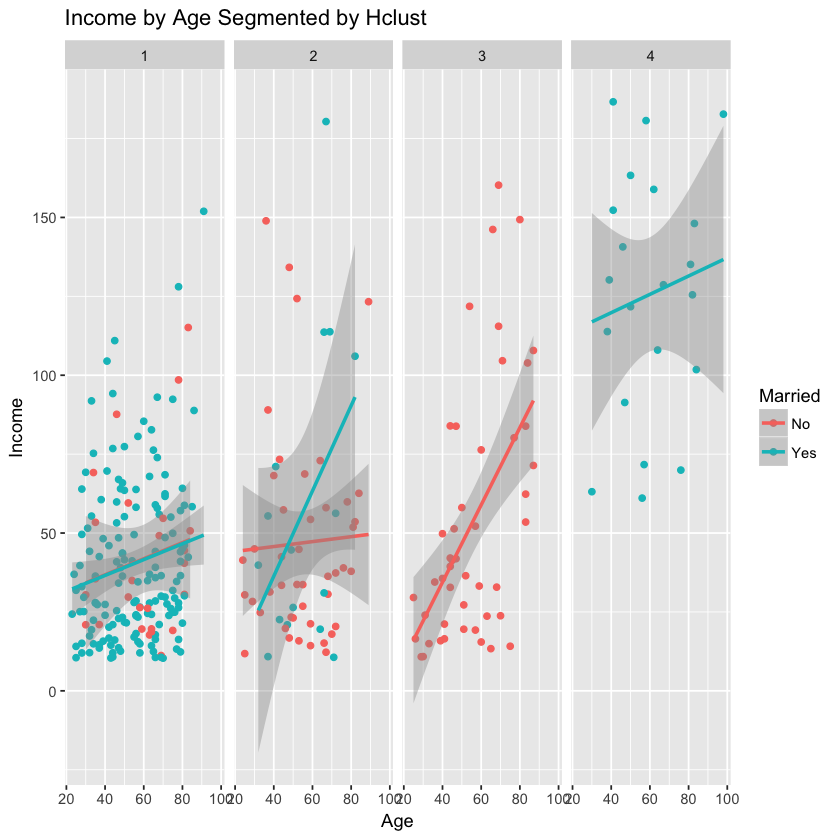

In [106]:
gg <- ggplot(credit, aes(x = Age, y = Income, col = Married))
gg + geom_point() + geom_smooth(method = "lm") + facet_grid(. ~ Segment) + ggtitle("Income by Age Segmented by Hclust")

This facet grid shows distinct differences between the segments from the h-clustering. We will examine this in the summary

### Summary of Analyses

The primary goal of this analysis was to look for any potential underlying groupings within the customer data that could help classify customers into certain groupings. The hierarchical clustering revealed that there are some underlying groupings that we could segment our customers by. After performing the H-clust, by looking at the heights of the clusters and the groupings, I concluded that 4 clusters would suffice for describing the underlying groupings. The CCPC of ~0.5 suggested that the dendogram mildly represented the difference matrix of all the variables within the data set which is why I decided to use the dendogram to choose and assign 4 assignment segments.

Looking closer at the clusters with clusplot revealed that the most distinguished groups (in terms of the 2 components that explain the most variability in the data) are groups 2 and 4. Overall, these groups had much in common, but all appeared to be distinguished enough to do some further analysis on to discover the differences between the groups. After observing the summary stats for all the groups (from the seg_summary function), these four groups can be classified as the following: 1) Lower-class families and singles, 2)Middle-class families and singles, 3) Single, social climbing men, 4) Upper-class married families. Identifying these groups allows for better service and better understanding of how customers needs can best be addressed.